## AB testing – Cookie Game (a Mobile Game)

Importing required libraries

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn 
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2

Changing the working directory

In [2]:
os.chdir("D:\MS Business Analytics – University of Cincinnati\Spectre\Project 1 - AB Testing")

Loading the overall dataset into a variable named "game"

In [3]:
game = pd.read_csv("cookie_cats.csv")

Let's have a look at the dataset

In [4]:
game.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
game.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [6]:
game.columns

Index(['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7'], dtype='object')

## Conducting basic EDA of the data to understand what all information has been provided

In [7]:
gate_30 = game[game["version"] == "gate_30"]
gate_30.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
6,1066,gate_30,0,False,False
11,2101,gate_30,0,False,False
13,2179,gate_30,39,True,False


In [8]:
gate_40 = game[game["version"] == "gate_40"]
gate_40.head()

,userid,version,sum_gamerounds,retention_1,retention_7
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
7,1444,gate_40,2,False,False


Let's see the number of game rounds by each user

In [9]:
gate_30.min()

userid                116
version           gate_30
sum_gamerounds          0
retention_1         False
retention_7         False
dtype: object

Now, Visualizing the histogram of number of gamerounds 

In [10]:
gate_30_v = gate_30.loc[(gate_30["sum_gamerounds"] >= 800) & (gate_30["sum_gamerounds"] <= 10000)]
gate_30_v.head()

,userid,version,sum_gamerounds,retention_1,retention_7
601,63617,gate_30,902,True,True
655,69927,gate_30,1906,True,True
1097,121303,gate_30,1374,True,True
2257,248748,gate_30,1309,True,True
2586,284610,gate_30,1252,True,True


(array([4.4699e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0. ,  4985.4,  9970.8, 14956.2, 19941.6, 24927. , 29912.4,
        34897.8, 39883.2, 44868.6, 49854. ]),
 <a list of 10 Patch objects>)

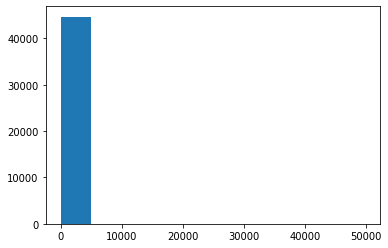

In [11]:
plt.hist(gate_30["sum_gamerounds"])

Clearly, we can see that the number of people who did not play the game again are very high

Let's 2 histograms, divided by number of game rounds people played

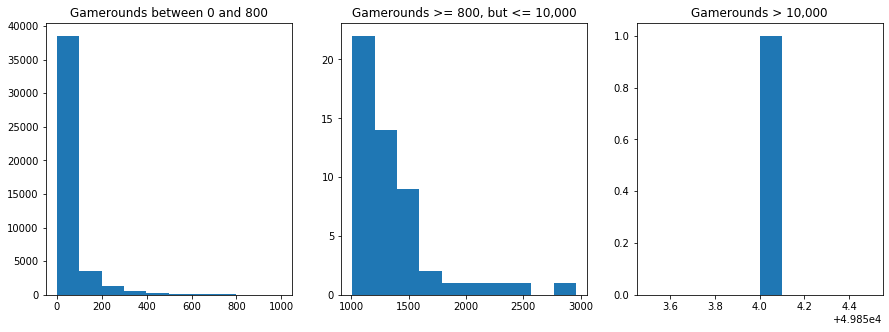

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15, 5))
ax1.set_title("Gamerounds between 0 and 800")
ax2.set_title("Gamerounds >= 800, but <= 10,000")
ax3.set_title("Gamerounds > 10,000")

ax1.hist(gate_30.loc[(gate_30["sum_gamerounds"] >= 0) & (gate_30["sum_gamerounds"] <= 1000)]["sum_gamerounds"])
ax2.hist(gate_30.loc[(gate_30["sum_gamerounds"] >= 1000) & (gate_30["sum_gamerounds"] <= 10000)]["sum_gamerounds"])
ax3.hist(gate_30.loc[(gate_30["sum_gamerounds"] > 10000)]["sum_gamerounds"])

plt.show()


Clearly, we can see how number of games played went down drastically post 300

Plotting the boxplot as well to see any outlier values in gate_30 data

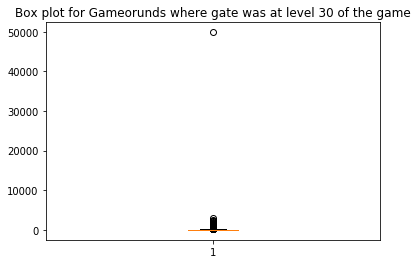

In [13]:
plt.boxplot(gate_30["sum_gamerounds"])
plt.title("Box plot for Gameorunds where gate was at level 30 of the game")
plt.show()

Clearly, there is 1 player who played >40,000 games; Now checking the data by removing that ourlier value

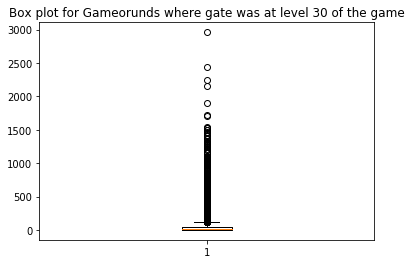

In [14]:
plt.boxplot(gate_30[gate_30["sum_gamerounds"] < 20000]["sum_gamerounds"])
plt.title("Box plot for Gameorunds where gate was at level 30 of the game")
plt.show()

Now, looking at the other group of data, i.e. for the test group who were shown the gate at  level 40 

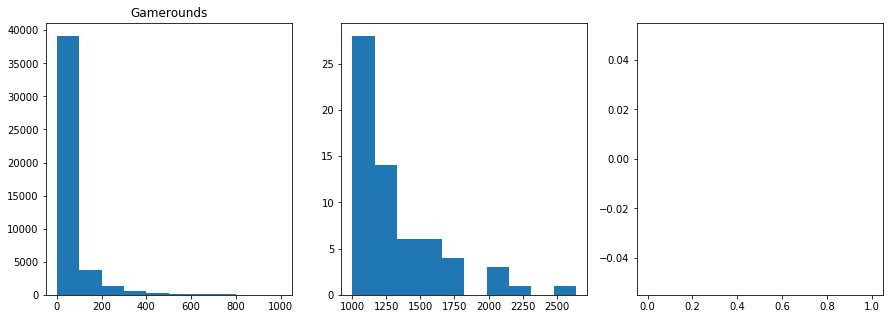

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
ax1.set_title("Gamerounds")
ax1.hist(gate_40.loc[(gate_40["sum_gamerounds"] >= 0) & (gate_40["sum_gamerounds"] <= 1000)]["sum_gamerounds"])
ax2.hist(gate_40.loc[(gate_40["sum_gamerounds"] > 1000) & (gate_40["sum_gamerounds"] <= 10000)]["sum_gamerounds"])
ax3.hist(gate_40.loc[(gate_40["sum_gamerounds"] > 10000)]["sum_gamerounds"])
plt.show()

Clearly, the trend is more or less the same here as well, as it was in the case of players who played game in which the gate was at level 30

Now, plotting a boxplot to see if this data has any outliers

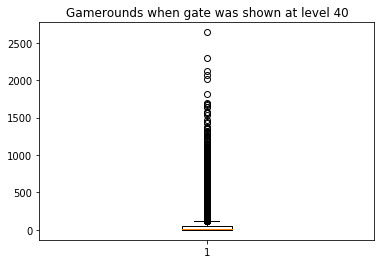

In [16]:
plt.boxplot(gate_40["sum_gamerounds"])
plt.title("Gamerounds when gate was shown at level 40")
plt.show()

Now, taking a look at the data for 1_day retention for players which had the gate set at level 30

Total Number of Players =  44700
number of Players which returned =  20034
Ratio of Number of Players Retained After 1 Day =  0.4481879194630872


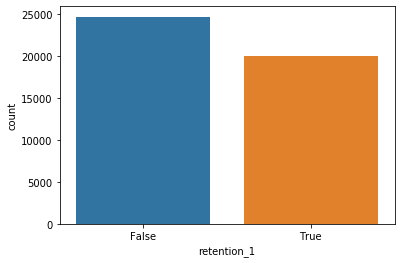

In [17]:
sns.countplot("retention_1", data = gate_30)
number_of_retained_players_1 = gate_30["retention_1"].sum()
print("Total Number of Players = ", gate_30["userid"].count())
print("number of Players which returned = ", number_of_retained_players_1)
print("Ratio of Number of Players Retained After 1 Day = ", number_of_retained_players_1/ gate_30["userid"].count())

Now, visualizing the same thing for 7-day retention

Total Number of Players =  44700
number of Players which returned after day 7 =  8502
Ratio of Number of Players Retained After 1 Day =  0.19020134228187918


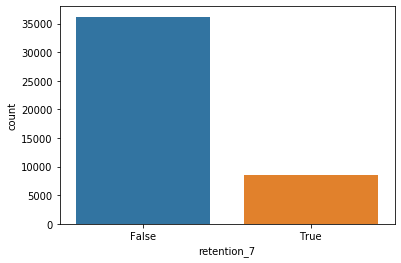

In [18]:
sns.countplot("retention_7", data = gate_30)
number_of_retained_players_7 = gate_30["retention_7"].sum()
print("Total Number of Players = ", gate_30["userid"].count())
print("number of Players which returned after day 7 = ", number_of_retained_players_7)
print("Ratio of Number of Players Retained After 1 Day = ", number_of_retained_players_7/ gate_30["userid"].count())

Now, let's take a look at the data for test group

Let's see this for group with 30 members

Total Number of Players =  45489
number of Players which returned =  20119
Ratio of Number of Players Retained After 1 Day =  0.44228274967574577


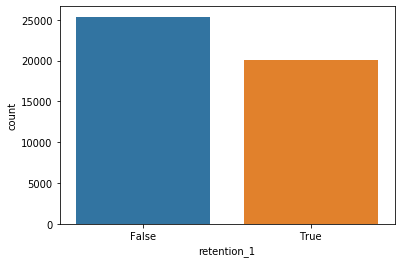

In [19]:
sns.countplot("retention_1", data = gate_40)
number_of_retained_players_t1 = gate_40["retention_1"].sum()
print("Total Number of Players = ", gate_40["userid"].count())
print("number of Players which returned = ", number_of_retained_players_t1)
print("Ratio of Number of Players Retained After 1 Day = ", number_of_retained_players_t1/ gate_40["userid"].count())

Total Number of Players =  45489
number of Players which returned =  8279
Ratio of Number of Players Retained After 1 Day =  0.18200004396667327


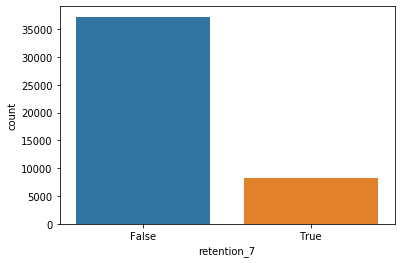

In [20]:
sns.countplot("retention_7", data = gate_40)
number_of_retained_players_t7 = gate_40["retention_7"].sum()
print("Total Number of Players = ", gate_40["userid"].count())
print("number of Players which returned = ", number_of_retained_players_t7)
print("Ratio of Number of Players Retained After 1 Day = ", number_of_retained_players_t7/ gate_40["userid"].count())

## Now, we are trying to understand if the distribution we have is statistically significant

If we compare both retention rates, we see that by shifting the gate to next level actually decreased the average 1-day, as well as 7-day retention of users

Now, we need to understand if this distribution of both 1-day and 7-day retention is statistically significant or not

To understand the same, we will use chi-square test

Let's state our null and alternative hypothesis

<b> Null Hypothesis (Ho): There is no chnage in the 1-day retention of players playing the cookie cats game, if gate is moved from level 30 to level 40

Alternative Hypothesis (H1): There is change in the 1-day retention of players playing the cookie cats game, if gate is moved from level 30 to level 40 </b>

Confidence Interval is 95%

Now, let's do this for 1-day retention first; creating the contingency matrix for chi square test, we will have 4 values , gate_30 - retained, gate_30 - not retained, gate_40 - retained, gate_40 - not retained

In [21]:
Contigency_matrix = np.array([[gate_30["retention_1"].sum(), gate_30["userid"].count() - gate_30["retention_1"].sum()], [gate_40["retention_1"].sum(), gate_40["userid"].count() - gate_40["retention_1"].sum()]])
print(Contigency_matrix)

[[20034 24666]
 [20119 25370]]


In [22]:
stats.chi2_contingency(Contigency_matrix)

(3.1591007878782262,
 0.07550476210309086,
 1,
 array([[19900.86485048, 24799.13514952],
        [20252.13514952, 25236.86485048]]))

Now, we get the p-value for this test ~7.6%; with alpha value = 5%, we cannot reject the null hypothesis, hence, we conclude that for 1-day retention, changing the gate presence from 30 to 40 has no effect on retention

Now, completing this test for 7-day retention

In [23]:
Contigency_matrix_7 = np.array([[gate_30["retention_7"].sum(), gate_30["userid"].count() - gate_30["retention_7"].sum()], [gate_40["retention_7"].sum(), gate_40["userid"].count() - gate_40["retention_7"].sum()]])
print(Contigency_matrix_7)

[[ 8502 36198]
 [ 8279 37210]]


In [24]:
stats.chi2_contingency(Contigency_matrix_7)

(9.959086799559165,
 0.0016005742679058301,
 1,
 array([[ 8317.09742873, 36382.90257127],
        [ 8463.90257127, 37025.09742873]]))

Now, here we have p-value < 0.05, hence, the we can reject the null hypothesis and say that there is change in 7-day retention of players if gate is moved form level 30 to level 40

## Now, computing the same results using chi-square critical value for both 1-day and 7-day retention

We have degrees of freedom for both the case as df = 1

In [25]:
critical_value=chi2.ppf(q=1-0.05,df=1)
print(critical_value)

3.841458820694124


Now, we can see that for 1-day retention, chi-square observed < chi-square critical, hence we cannot reject null hypothesis;
However, in case of 7-day retention, chi-square observed > chi-square critical, hence, we can reject the null hypothesis and accept alternative hypothesis

Hence, as 7-day retention declined in this case, we may state that we should not change the level of gate from 30 to 40 